# Linear Programming in Python
## Modeling a Story into Mathematics
<br>
<p><b>Connor Owen</b><br>
<a href="mailto:cowen33@gatech.edu">cowen33@gatech.edu</a></p>

<a href="https://en.wikipedia.org/wiki/Linear_programming">Linear programming</a> is a mathematical method to optimize a model that is written as an objective constrained by a set of linear equalities. The technique is extremely versatile and used in a variety of fields—anywhere from business to environmental engineering—and can cover various types of problems. In general, most companies or organizations have profits or other numerical goals they want to maximize, or costs they want to minimize while being constrained by a limited number of resources (whether they be natural resources, economic resources, etc...). 

A typical linear program can be written using canonical form: 

$$
\begin{align} 
&\max\; {\mathbf{c^Tx}}\\
&\mathrm{such\ that}\; A \mathbf{x \le b }\\ 
&\mathrm{and}\; \mathbf{x \ge 0}
\end{align}
$$
    

where $\mathbf{c}$ in most cases represents a profit or cost matrix of the objective function $\mathbf{c^Tx}$ and $\mathbf{Ax\le b}$ is a matrix of constraints with a limited number of resources $\mathbf b$.

                                            *            *            *
    
To explore modeling a business decision into a linear program, and subsequently how to optimize the program using Python, I will present a simple problem involving one of my favorite things: coffee! This idea was inspired by a trip I took to Nicaragua, where I had the chance to visit various coffee farmers and learn more about the coffee cultivation and production process.

Coffee first came to Nicaragua in the 1800s, and has since been integral to the economy and society of the country. Coffee is one of the country's largest exports and contributes almost US$140 million annually to their economy.  Of the various coffee types (namely Arabica, Robusta and Liberica), <a href="https://en.wikipedia.org/wiki/Coffea_arabica">Arabica</a> is the most widely cultivated in Nicaragua. Of the Arabica coffee types, Bourbon, Caturra, and Catimor are the most widely grown varieties, and produce coffees with different tastes, textures, and caffeine contents.

Below is a map of Nicaragua showing some of the more important places where coffee cultivation takes place. The map is produced using <a href="http://matplotlib.org/basemap/">Basemap</a> and shapefiles for Nicaragua—more information on how to build maps can be seen in one of my <a href="https://github.com/ccowen37/Traveling-Salesman/blob/master/TSP-Final.ipynb">other tutorials</a>. The three dots represent the capitals of the departments of Segovia, Matagalpa, and Jinotega—all located in the central mountainous region. 

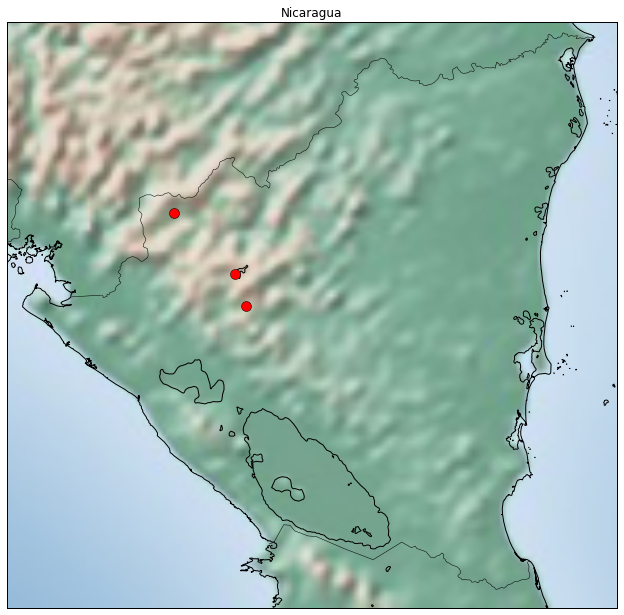

In [17]:
import shapefile
import matplotlib.pyplot as plt

nicaragua = "Nicaragua/nicaragua"
sf = shapefile.Reader(nicaragua + '.shp')

from mpl_toolkits.basemap import Basemap

#load the map of Nicaragua 
#loads the Nicaragua map and draws it using Basemap and Matplotlib
bbox = sf.bbox
bbox[0] -= 0.08 #here we add a bit of padding to the bounding box
bbox[1] -= 0.08
bbox[2] += 0.08
bbox[3] += 0.08

#this is the map variable initiated by Basemap
m = Basemap(llcrnrlon=bbox[0], llcrnrlat=bbox[1], urcrnrlon=bbox[2],\
urcrnrlat=bbox[3], resolution='h', projection='merc', area_thresh=0.1)

%matplotlib inline
#initiate a figure with maplotlib
fig = plt.gcf()
#draw all the necessary parameters from the map
m.drawcoastlines()
m.drawcountries()
#m.fillcontinents()
m.shadedrelief()
(lat1, lon1) = (13.63333, -86.483333) #Segovia
x,y = m(lon1, lat1)
m.plot(x, y, 'ro', markersize=10)
(lat1, lon1) = (12.916667, -85.916667) #Matagalpa
x,y = m(lon1, lat1)
m.plot(x, y, 'ro', markersize=10)
(lat1, lon1) = (13.166667, -86) #Jinotega
x,y = m(lon1, lat1)
m.plot(x, y, 'ro', markersize=10)


fig.set_size_inches(18.5, 10.5)
plt.title("Nicaragua")
plt.show()


Now we move onto the story of our Nicaraguan coffee farmer. While the story is construed for demonstrative purposes, the central ideas can be extended into larger and more complex problems, although they may require more advanced algorithms and more advanced mathematical programming techniques. 

Our coffee farmer has the ability to grow three different types of Arabica coffee on his land: Bourbon, Caturra and Catimor beans. The farmer has 240 acres that he can dedicate to his coffee while the Bourbon, Caturra and Catimor plants take up .04, .06, and .05 acres respectively. After negotiating with his coffee buyer, our farmer concludes that based on average plant yields, he can make approximately \$1600, \$2400, \$2750 annually per plant respectively . 

After performing some simple time studies, our farmer concludes that on average, the Bourbon, Caturra and Catimor plants will require approximately .1, .3, and .2 hours of labor per plant respectively, while labor is continuously available at a rate of $5/hour and necessary for 200 days out of the year. 

Our farmer's objective, like many businesses, is to maximize his profit, meaning we will have to write an objective function that includes the revenues and costs of our farmer's plantation. 


                                            *            *            *

To get our problem started, we will have to identify the main components of our linear program; namely the objective function, our variable, our data, and our constraints. 

When we read through the problem, we see that all of our revenues, costs, and considerations are driven through 1 set of decision variables: the number of Bourbon, Caturra and Catimor plants that our farmer decides to plant. 

$$
\begin{align} 
&x_1\; =\; \mathrm{Number\ of\ Bourbon\ plants\ in\ the\ plantation}\\
&x_2\; =\; \mathrm{Number\ of\ Caturra\ plants\ in\ the\ plantation}\\
&x_3\; =\; \mathrm{Number\ of\ Catimor\ plants\ in\ the\ plantation}\\
\end{align}
$$

Now to start incorporating our revenues, we'll use the variable $r_i$ to represent the money that we can annually make from 1 tree of coffee type $i$ by selling to our buyer. We also will write that our labor costs per plant will be equal to $(number\ of\ labor\ hours\ per\ plant)*(number\ of\ labor\ days)*(cost\ of\ labor)$. We will represent that amount by $c_i$, which represents the annual labor costs for coffee plant type $i$.

$$
\begin{align} 
&\{p_1; p_2; p_3\} = \{\$1600,\ \$2400,\ $2750\} \\
&\{c_1; c_2; c_3\} = \{0.1*200*\$5,\ 0.3*200*\$5,\ 0.2*200*\$5 \}\ =  \{\$100,\ \$300,\ $200\} \\
\end{align}
$$


Now that we've defined our variable and data, we can write our objective and constraints. Our farmer told us that his main goal is to maximize his profit, which we will write mathematically as (revenues)-(costs). 

$$
\begin{align}
&\sum_{i=1}^3 p_i \bullet x_i - c_i \bullet x_i\; =\; \sum_{i=1}^3 (p_i - c_i) \bullet x_i 
\end{align}
$$

Now we will write our land constraint: the amount of land that all the coffee plants take up cannot exceed the total amount of land that the coffee farmer–240 acres. We will use the variable $l_i$ to represent the number of acres a coffee plant type i consumes.  

$$
\begin{align}
&\sum_{i=1}^3 l_i \bullet x_i  \le 240  
\end{align}
$$

Before we get to planting, however, our coffee supplier gives us one more piece of information: in order to complete the contract they need to be guaranteed at least 150,000 pounds of Bourbon and they're willing to buy at most 30,000 pounds of Catimor beans. Our farmer tells us that he can expect about 5, 3.2 and 2.6 pounds of coffee cherries from each coffee variety. We will represent these last constraints as functions of our data and variables already defined.

$$
\begin{align}
&x_1 \bullet 4 \le 150,000 \\
&x_3 \bullet 2.6 \ge 130,000 \\
\end{align}
$$


In the end, our linear programming formulation of the problem looks like this: 

$$
\begin{align}
\max\; &{\sum_{i=1}^3 (p_i - c_i) \bullet x_i }\\
\mathrm{such\ that}\; & \sum_{i=1}^3 l_i \bullet x_i  \le 240\\ 
&x_1 \bullet 5 \ge 150,000 \\
&x_3 \bullet 2.6 \le 30,000 \\
&\mathrm{and}\; x_i \ge 0\; \forall\ i
\end{align}
$$

    

                                            *            *            *
                                            

With all of our linear program defined, we can now solve it! There are many ways to go about solving a linear program; however, the point of this tutorial is not to explore the various algorithms available. Instead we will see how to encode a linear program using Python for an open-source optimization engine. 

I'll use the Python library <a href="http://cvxopt.org/">cvxopt</a> to implement and solve the linear program. Cvxopt is written specifically for convex optimization problems, and connects to various solvers such as CPLEX and CLP, as well as a built in solver. 

When we look at the <a href="http://cvxopt.org/userguide/coneprog.html#linear-programming">user guide</a> documentation of cvxopt, we find that linear programs have to be defined slightly differently than what we originally wrote–namely that the max problem becomes a min problem. So when we change from max to min, we also have to negate the profits in the objective function. 

Now we simply define the matrices $\mathbf c$, $\mathbf A$ and $\mathbf b$, and the decision variables $\mathbf x$ are inferred from the number of columns. Then we use the "solvers.lp" function with the matrices as inputs, and then we  print out the solution!  


In [80]:
from cvxopt import matrix, solvers

#profit matrix
c = matrix([-1500., -2100., -2550.])

#matrix of resource utilization of variables
A = matrix([ [0.04, 0, 0., -1., 0., 0.], [0.06, 0, -5,  0., -1., 0.], [0.05, 2.6, 0, 0., 0., -1.] ])

#matrix of resource limitations/requirements
b = matrix([240., 30 ,-150,  0., 0., 0.])

#you can choose from different solvers using the solver parameter here
sol = solvers.lp(c, A, b, solver=None)
print(sol['x'])





     pcost       dcost       gap    pres   dres   k/t
 0: -1.0549e+05 -2.8522e+05  5e+05  3e-02  3e+00  1e+00
 1: -1.0444e+07 -1.4710e+07  3e+08  9e-01  7e+01  5e+05
 2: -8.2739e+06 -7.7548e+06  8e+06  3e-02  2e+00  7e+05
 3: -8.9723e+06 -8.9709e+06  3e+05  1e-03  8e-02  7e+03
 4: -8.9960e+06 -8.9960e+06  1e+04  6e-05  4e-03  3e+02
 5: -9.0028e+06 -9.0027e+06  3e+03  1e-05  8e-04  2e+02
 6: -9.0033e+06 -9.0033e+06  5e+01  2e-07  2e-05  6e+00
 7: -9.0033e+06 -9.0033e+06  5e-01  2e-09  2e-07  6e-02
 8: -9.0033e+06 -9.0033e+06  5e-03  2e-11  2e-09  6e-04
Optimal solution found.
[ 5.94e+03]
[ 3.00e+01]
[ 1.15e+01]



When we print out the results from our linear program solver, we see that the following amount of plants is optimal for our coffee farmer: <b>5,940</b> of the Bourbon variety, <b>300</b> of the Caturra, and <b>11.5</b> of the Catimor. Note that since we did not place any integrality restrictions on our program, that it is possible for an amount like 11.5 to be a valid solution, while not necessarily making sense in this context. For this problem though, we could say that the farmer could round up or down to the nearest whole value and still be very close to optimality. 

## Resources

Shapefile for Nicaragua: http://www.mapcruzin.com/free-nicaragua-country-city-place-gis-shapefiles.htm also supported by www.openstreetmap.org

Nicaraguan Coffee Types: http://www.gr8place.com/coffee-varieties/

History of Coffee in Nicaragua: http://equalexchange.coop/history-of-coffee-in-nicaragua
